In [114]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, make_scorer, balanced_accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import timeit
import mlrose_hiive as mlrose



-1    4849
 1    1001
Name: cleave, dtype: int64

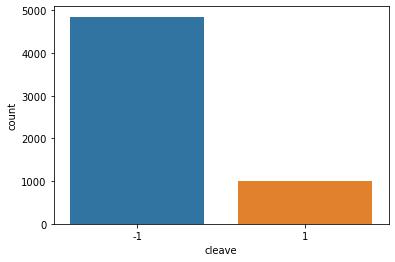

In [2]:
# Dataset source:
#http://archive.ics.uci.edu/ml/datasets/HIV-1+protease+cleavage#
# combined all datasets, removing duplicates
# Read in data
data = pd.read_csv('../data/HIV_DataSet.csv', sep=',')


sns.countplot(data['cleave']) # plot number of things with each value
# number of negative cleave values versus positive.
data['cleave'].value_counts(sort=True)

In [147]:
# Tuning 
# Create training, testing, and validation sets

X = data.drop('cleave', axis=1) # last value is the cleavage

y = data['cleave']

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2) # 80/20 default

# scale so it converges
scaling = MinMaxScaler()
x_train = scaling.fit_transform(x_train)
x_test = scaling.transform(x_test)

enc = OneHotEncoder(categories='auto')
y_train = enc.fit_transform(y_train.values.reshape(-1, 1)).todense()
y_test = enc.transform(y_test.values.reshape(-1, 1)).todense()




In [27]:
clf_rhc = mlrose.NeuralNetwork(algorithm='random_hill_climb',
    hidden_nodes = [5], activation = 'relu', early_stopping=True, 
    random_state=0, is_classifier=True, bias=True)

parameters = {'max_iters': [100, 200, 300],
              'restarts': [1, 2, 3, 4, 5],
              'max_attempts': [10, 20, 30, 40],
              'learning_rate': [.001, .01, .1]}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf_rhc, parameters, scoring=acc_scorer, cv=5, n_jobs=4)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
clf_rhc = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf_rhc.fit(x_train, y_train)


NeuralNetwork(activation='relu', algorithm='random_hill_climb', bias=True,
              clip_max=10000000000.0, curve=False, early_stopping=True,
              hidden_nodes=[5], is_classifier=True, learning_rate=0.001,
              max_attempts=10, max_iters=300, mutation_prob=0.1, pop_size=200,
              random_state=0, restarts=1,
              schedule=GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001))

In [5]:
clf_sa = mlrose.NeuralNetwork(algorithm='simulated_annealing',
    hidden_nodes = [5], activation = 'relu', early_stopping=True, 
    random_state=0, is_classifier=True, bias=True)

parameters = {'max_iters': [100, 200, 300],
              'schedule': [mlrose.GeomDecay(), mlrose.ExpDecay()],
              'max_attempts': [10, 20, 30, 40],
              'learning_rate': [.001, .01, .1]}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf_sa, parameters, scoring=acc_scorer, cv=5, n_jobs=4)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
clf_sa = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf_sa.fit(x_train, y_train)

NeuralNetwork(activation='relu', algorithm='simulated_annealing', bias=True,
              clip_max=10000000000.0, curve=False, early_stopping=True,
              hidden_nodes=[5], is_classifier=True, learning_rate=0.001,
              max_attempts=20, max_iters=100, mutation_prob=0.1, pop_size=200,
              random_state=0, restarts=0,
              schedule=GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001))

In [6]:
clf_ga = mlrose.NeuralNetwork(algorithm='genetic_alg',
    hidden_nodes = [5], activation = 'relu', early_stopping=True, 
    random_state=0, is_classifier=True, bias=True)

parameters = {'max_iters': [100, 200, 300],
              'pop_size': [50, 100, 200],
              'mutation_prob': [.1, .2, .3],
              'max_attempts': [10, 20, 30, 40],
              'learning_rate': [.001, .01, .1]}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf_ga, parameters, scoring=acc_scorer, cv=5, n_jobs=4)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
clf_ga = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf_ga.fit(x_train, y_train)

NeuralNetwork(activation='relu', algorithm='genetic_alg', bias=True,
              clip_max=10000000000.0, curve=False, early_stopping=True,
              hidden_nodes=[5], is_classifier=True, learning_rate=0.001,
              max_attempts=10, max_iters=300, mutation_prob=0.3, pop_size=50,
              random_state=0, restarts=0,
              schedule=GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001))

random_hill_climb
Y Train Acc
0.8279914529914529
Y Test Acc
0.8273504273504273
Confusion Matrix
[[967   2]
 [200   1]]
Balanced Accuracy
0.5014555704449887

simulated_annealing
Y Train Acc
0.20512820512820512
Y Test Acc
0.20512820512820512
Confusion Matrix
[[ 53 916]
 [ 14 187]]
Balanced Accuracy
0.4925219105709841

genetic_alg
Y Train Acc
0.8143162393162393
Y Test Acc
0.8051282051282052
Confusion Matrix
[[940  29]
 [199   2]]
Balanced Accuracy
0.49001124408915175



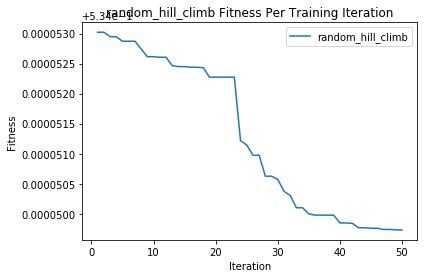

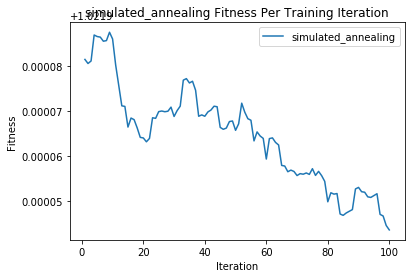

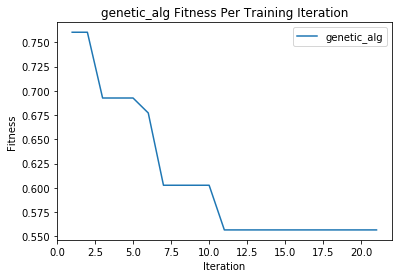

In [160]:
# optimizations from GridSearchCV
algos = {
    'random_hill_climb': 
    {'max_attempts': 20, 'max_iters': 50, 'mutation_prob': .1, 'pop_size': 200, 'restarts': 3},
    'simulated_annealing': 
    {'max_attempts': 20, 'max_iters': 100, 'mutation_prob': .1, 'pop_size': 200, 'restarts': 0},
    'genetic_alg': 
    {'max_attempts': 10, 'max_iters': 300, 'mutation_prob': .3, 'pop_size': 50, 'restarts': 0}}

results = {'random_hill_climb':
           {'time': None, 'weights': None, 'loss': None, 'pred_probs': None, 'fitness_curve': None},
           'simulated_annealing': 
           {'time': None, 'weights': None, 'loss': None, 'pred_probs': None, 'fitness_curve': None},
           'genetic_alg': 
           {'time': None, 'weights': None, 'loss': None, 'pred_probs': None, 'fitness_curve': None}
          }
for key, value in algos.items():
    start = timeit.default_timer()
    nn = mlrose.NeuralNetwork(
        hidden_nodes = [5], activation = 'relu', curve=True,algorithm=key, 
        max_iters=value['max_iters'], restarts=value['restarts'],bias=True, 
        is_classifier=True, learning_rate=0.00001,pop_size=value['pop_size'],
        early_stopping=True, clip_max=5, max_attempts=value['max_attempts'],
        mutation_prob=value['mutation_prob'], random_state=0)
    nn.fit(x_train, y_train)
    end = timeit.default_timer() - start
    results[key]['time'] = end

    results[key]['weights'] = nn.fitted_weights
    results[key]['loss'] = nn.loss
    results[key]['pred_probs'] = nn.predicted_probs
    results[key]['fitness_curve'] = nn.fitness_curve
    
    # Predict labels for train set and assess accuracy
    y_train_pred = nn.predict(x_train)

    y_train_accuracy = accuracy_score(y_train, y_train_pred)
    print(key)
    print("Y Train Acc")
    print(y_train_accuracy)


    # Predict labels for test set and assess accuracy
    y_test_pred = nn.predict(x_test)
    
    y_test_accuracy = accuracy_score(y_test, y_test_pred)
    print("Y Test Acc")
    print(y_test_accuracy)
    
    # for unbalanced data
    print('Confusion Matrix')
    print(confusion_matrix(y_test.argmax(axis=1), y_test_pred.argmax(axis=1)))
    print('Balanced Accuracy')
    print(balanced_accuracy_score(y_test.argmax(axis=1), y_test_pred.argmax(axis=1)))
    
    print()
        
results = pd.DataFrame(results)
plot_results(results)

In [132]:
def plot_results(results):
    # Plot Fitness vs Iters
    for key, value in results.items():
        # fitness curve at each training iteration
        plt.plot(np.arange(1, len(value['fitness_curve']) + 1), value['fitness_curve'], label=key)
        plt.title(key + ' Fitness Per Training Iteration')
        plt.xlabel('Iteration')
        plt.ylabel('Fitness')
        plt.legend()
        plt.savefig('../images/' + key + '_nnet_train_iter_v_fitness.png')
        plt.show()
        plt.clf()
        plt.close()